# Dataset Detail
Dataset has done on 25 subjects (15 males and 10 females). One subject is apprear on 3 session on same MI task. <br>


*   1-31 and 36-64 - EEG electrode = All 60 electrodes
*   32-35          - EOG electrode
*   65-71          - EMG electrode

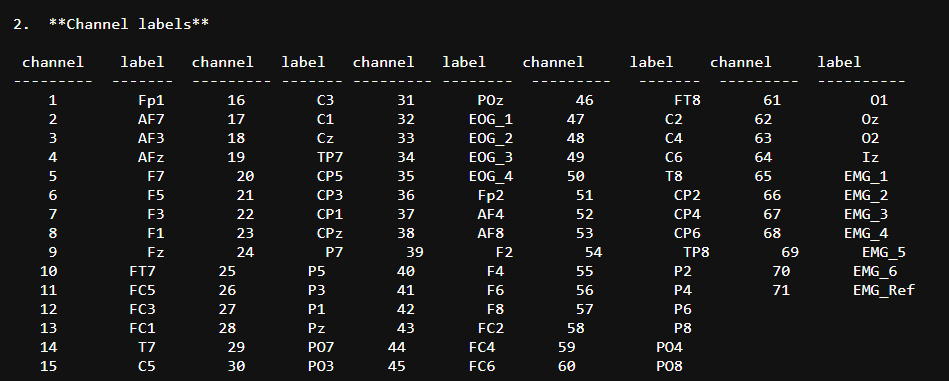

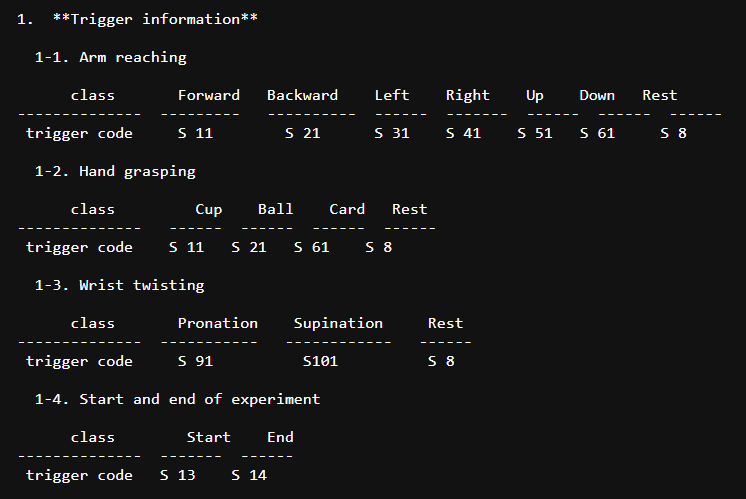

In [1]:
!pip install mne

In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

In [10]:
# Connect Google Drive Data
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [11]:
# eeg_data = '/content/drive/MyDrive/research/data'
eeg_data = '/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata'
dir = os.listdir(eeg_data)
for file in dir:
  print(file)

session2_sub19_twist_MI.vmrk
session2_sub19_twist_realMove.vmrk
session2_sub20_twist_realMove.eeg
session1_sub23_twist_MI.vmrk
session2_sub14_twist_MI.vhdr
session2_sub2_twist_MI.vmrk
session2_sub20_twist_realMove.vhdr
session3_sub1_twist_realMove.vmrk
session3_sub7_twist_MI.vmrk
session1_sub16_twist_realMove.vhdr
session1_sub7_twist_MI.vmrk
session2_sub5_twist_realMove.vmrk
session2_sub10_twist_realMove.vmrk
session2_sub7_twist_realMove.vhdr
session1_sub15_twist_MI.vhdr
session1_sub3_twist_realMove.eeg
session2_sub24_twist_realMove.vhdr
session2_sub11_twist_realMove.vhdr
session2_sub7_twist_MI.eeg
session1_sub6_twist_MI.vmrk
session1_sub15_twist_MI.vmrk
session2_sub25_twist_MI.vmrk
session1_sub6_twist_realMove.vmrk
session1_sub5_twist_realMove.eeg
session2_sub11_twist_realMove.eeg
session2_sub16_twist_realMove.vmrk
session1_sub2_twist_MI.vmrk
session1_sub25_twist_MI.vmrk
session2_sub3_twist_MI.eeg
session3_sub23_twist_realMove.eeg
session3_sub22_twist_realMove.vmrk
session1_sub22_twis

In [12]:
vhdr_path = eeg_data + '/session1_sub1_twist_MI.vhdr'
raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)

# plot a sample
# raw.plot()


Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub1_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2605499  =      0.000 ...  1042.200 secs...


/tmp/ipykernel_72662/3414975982.py:2: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_72662/3414975982.py:2: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_72662/3414975982.py:2: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


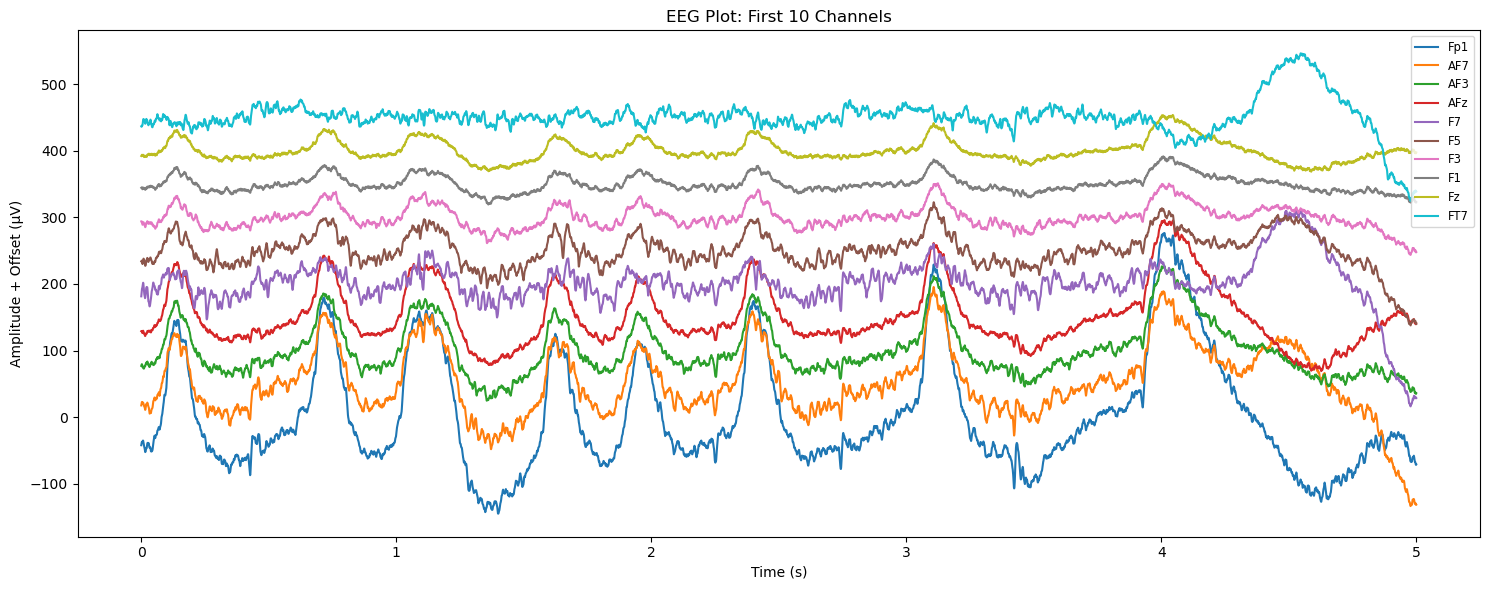

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_raw_inline(raw, n_channels=10, duration_sec=5):
    """
    Plot the first n_channels from an MNE Raw object inline in Jupyter notebook.

    Parameters:
        raw (mne.io.Raw): The raw EEG data.
        n_channels (int): Number of channels to plot.
        duration_sec (int): Duration in seconds to display.
    """
    sfreq = int(raw.info['sfreq'])
    n_samples = min(sfreq * duration_sec, raw.n_times)

    data, times = raw[:n_channels, :n_samples]

    plt.figure(figsize=(15, 6))
    for i in range(n_channels):
        plt.plot(times[:n_samples], data[i, :n_samples] * 1e6 + i * 50, label=raw.ch_names[i])  # µV + offset
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude + Offset (µV)')
    plt.title(f'EEG Plot: First {n_channels} Channels')
    plt.legend(loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()

plot_raw_inline(raw, n_channels=10, duration_sec=5)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_raw_nice(raw, n_channels=10, duration_sec=5, scale=50):
    """
    Nicely plot first n_channels from MNE Raw inline in Jupyter with clear labels and offsets.

    Parameters:
        raw (mne.io.Raw): MNE Raw EEG data.
        n_channels (int): Number of channels to plot.
        duration_sec (int): Duration of data to show in seconds.
        scale (float): Vertical offset multiplier between channels.
    """
    sfreq = int(raw.info['sfreq'])
    n_samples = min(sfreq * duration_sec, raw.n_times)

    data, times = raw[:n_channels, :n_samples]

    plt.figure(figsize=(15, 8))
    y_ticks = []
    y_ticklabels = []

    for i in range(n_channels):
        # Scale and offset each channel for clarity
        trace = data[i, :n_samples] * 1e6 + i * scale
        plt.plot(times[:n_samples], trace, color='C0')
        plt.fill_between(times[:n_samples], i * scale, trace, color='C0', alpha=0.3)
        y_ticks.append(i * scale)
        y_ticklabels.append(raw.ch_names[i])

    plt.yticks(y_ticks, y_ticklabels, fontsize=10)
    plt.xlabel('Time (seconds)', fontsize=12)
    plt.title(f'EEG Signals (First {n_channels} Channels)', fontsize=14)
    plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [26]:
plot_raw_nice(raw, n_channels=8, duration_sec=4)

In [15]:
import matplotlib
matplotlib.use('Agg')  # disables GUI popups

In [16]:
print(raw.ch_names)

['Fp1', 'AF7', 'AF3', 'AFz', 'F7', 'F5', 'F3', 'F1', 'Fz', 'FT7', 'FC5', 'FC3', 'FC1', 'T7', 'C5', 'C3', 'C1', 'Cz', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'P7', 'P5', 'P3', 'P1', 'Pz', 'PO7', 'PO3', 'POz', 'hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D', 'Fp2', 'AF4', 'AF8', 'F2', 'F4', 'F6', 'F8', 'FC2', 'FC4', 'FC6', 'FT8', 'C2', 'C4', 'C6', 'T8', 'CP2', 'CP4', 'CP6', 'TP8', 'P2', 'P4', 'P6', 'P8', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz', 'EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref']


In [ ]:
# raw.plot(n_channels=10, scalings='auto')

Using qt as 2D backend.


In [17]:
# Remove EOG channels.
EOG = [ch for ch in raw.ch_names if 'EOG' in ch]
print(EOG)
raw.drop_channels(EOG)

['hEOG_L', 'hEOG_R', 'vEOG_U', 'vEOG_D']


<RawBrainVision | session1_sub1_twist_MI.eeg, 67 x 2605500 (1042.2 s), ~1.30 GiB, data loaded>

In [18]:
# Remove EMG Channels
EMG = [ch for ch in raw.ch_names if 'EMG' in ch]
print(EMG)
raw.drop_channels(EMG)

['EMG_1', 'EMG_2', 'EMG_3', 'EMG_4', 'EMG_5', 'EMG_6', 'EMG_ref']


<RawBrainVision | session1_sub1_twist_MI.eeg, 60 x 2605500 (1042.2 s), ~1.16 GiB, data loaded>

In [19]:
# Apply Band Pass filter to take only alpha beta and gama signals which corresponds to MI task
raw.filter(1., 30., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 8251 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


<RawBrainVision | session1_sub1_twist_MI.eeg, 60 x 2605500 (1042.2 s), ~1.16 GiB, data loaded>

In [20]:
# Apply ICA
#Artifact Removal via ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=42)
ica.fit(raw)
ica.exclude = [...]  # based on visual or auto EOG detection
raw = ica.apply(raw)

Fitting ICA to data using 60 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 21.7s.
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 0 ICA components
    Projecting back using 60 PCA components


In [23]:
plot_raw_nice(raw, n_channels=8, duration_sec=4)

## Anotaions of EEG file
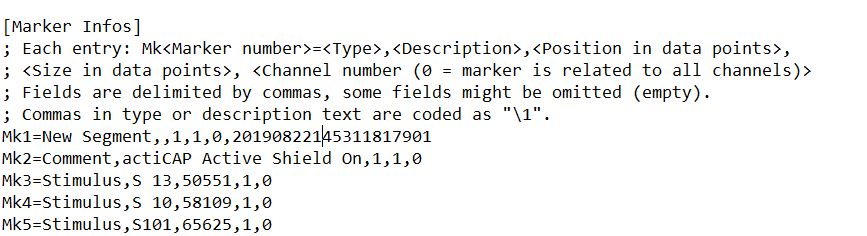
<br>
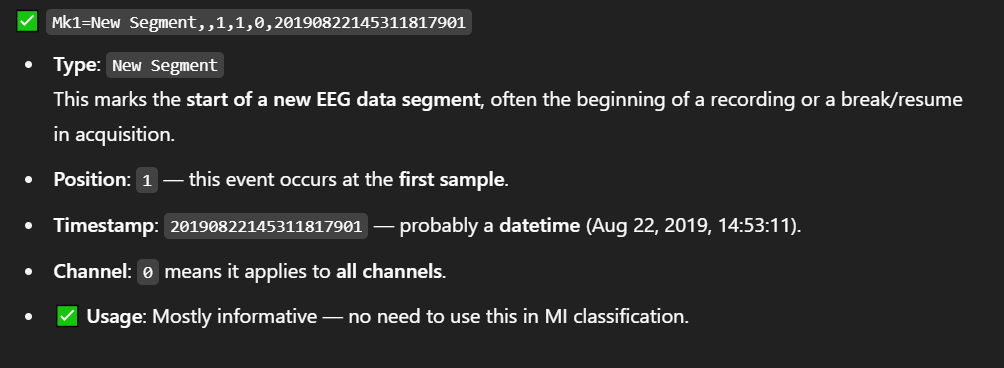
<br>
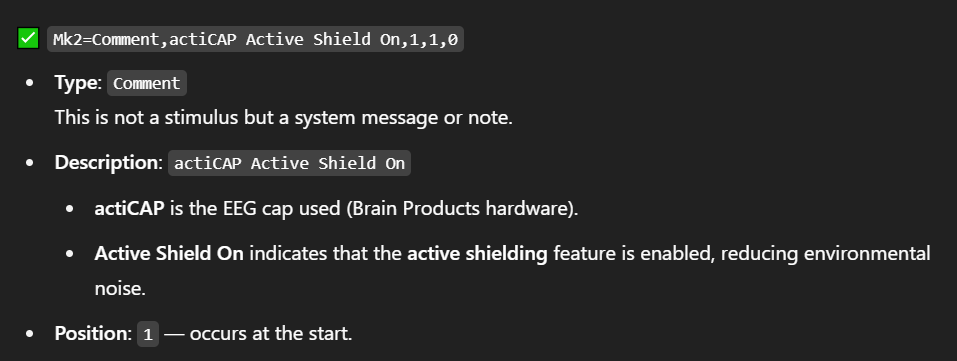

In [27]:
# Extract annotations (i.e., event labels)
annotations = raw.annotations

# Display all annotations
print(annotations) # 304 - There is 304 events in this file

<Annotations | 304 segments: Comment/actiCAP Active Shield On (1), New ...>


In [28]:
# Convert annotations to events
events, event_id = mne.events_from_annotations(raw)

# Sample available events
print(event_id)

Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
{np.str_('Comment/actiCAP Active Shield On'): 10001, np.str_('New Segment/'): 99999, np.str_('Stimulus/S  8'): 8, np.str_('Stimulus/S  9'): 9, np.str_('Stimulus/S 10'): 10, np.str_('Stimulus/S 13'): 13, np.str_('Stimulus/S 14'): 14, np.str_('Stimulus/S 91'): 91, np.str_('Stimulus/S101'): 101}


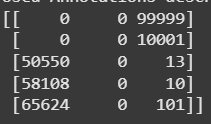
<br>
where 1st column give sample index where the event happened. 2nd column is channel. It is 0 means that event is affected to all EEG electrode. 3rd column gives event code. (check vmrk file manually for further info)

## Extract Pronation and Supination Task

In [35]:
wrist_events = {'pronation': 91, 'supination': 101}

epochs = mne.Epochs(raw, events, event_id=event_id, tmin=-0.2, tmax=1.0,event_repeated="merge", baseline=(None, 0), preload=True)

print(epochs.event_id)


Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
303 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 303 events and 3001 original time points ...
1 bad epochs dropped
{np.str_('Stimulus/S  8'): 8, np.str_('Stimulus/S  9'): 9, np.str_('Stimulus/S 10'): 10, np.str_('Stimulus/S 13'): 13, np.str_('Stimulus/S 14'): 14, np.str_('Stimulus/S 91'): 91, np.str_('Stimulus/S101'): 101, 'Comment/actiCAP Active Shield On/New Segment/': 1}


In [37]:
X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
y = epochs.events[:, -1]  # labels: 91 or 101
y = np.array([0 if label == 91 else 1 for label in y])  # 0: pronation, 1: supination

In [38]:
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Define pipeline
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
lda = LinearDiscriminantAnalysis()
clf = Pipeline([('CSP', csp), ('LDA', lda)])

# Evaluate model
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Classification accuracy: %f (+/- %f)" % (scores.mean(), scores.std()))


Computing rank from data with rank=None
    Using tolerance 0.0016 (2.2e-16 eps * 60 dim * 1.2e+11  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0017 (2.2e-16 eps * 60 dim * 1.2e+11  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0017 (2.2e-16 eps * 60 dim * 1.3e+11  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMPIRI

# Intra Subject Variability


In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mne

In [ ]:
import os
import glob

eeg_data = '/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata'

# Get all .vhdr files in the directory
all_vhdr_files = glob.glob(os.path.join(eeg_data, '*.vhdr'))

# Filter out files that contain 'realMove' in their filename
vhdr_paths = [f for f in all_vhdr_files if 'Move' not in os.path.basename(f) and 'session3_sub13' not in os.path.basename(f) and 'session1_sub23' not in os.path.basename(f) and 'session2_sub7' not in os.path.basename(f) and 'session2_sub12' not in os.path.basename(f) and 'session2_sub6' not in os.path.basename(f)]

for x in vhdr_paths:
    print(x)

print(len(vhdr_paths))

/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub14_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub15_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub3_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub17_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub24_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub1_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub24_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub7_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub18_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub16_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub6_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub1_twist_MI.vhdr
/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session

In [ ]:
# DON"T Run memory overloaded issue with this code
wrist_events = {'pronation': 91, 'supination': 101}

def loadData():
  X_all = []
  y_all = []

  for vhdr_path in vhdr_paths:
    raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)

    # Remove EOG channels.
    EOG = [ch for ch in raw.ch_names if 'EOG' in ch]
    raw.drop_channels(EOG)

    # Remove EMG Channels
    EMG = [ch for ch in raw.ch_names if 'EMG' in ch]
    raw.drop_channels(EMG)

    # Apply Band Pass filter to take only alpha beta and gama signals which corresponds to MI task
    raw.filter(8., 30., fir_design='firwin')

    events, event_id = mne.events_from_annotations(raw)
    # epochs = mne.Epochs(raw, events, event_id=wrist_events, tmin=-0.2, tmax=2.0,
    #                 baseline=(None, 0), preload=True)
    epochs = mne.Epochs(raw, events, event_id=wrist_events, tmin=-0.2, tmax=1.0,event_repeated="merge", baseline=(None, 0), preload=True)

    X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
    y = epochs.events[:, -1]  # labels: 91 or 101
    y = np.array([0 if label == 91 else 1 for label in y])  # 0: pronation, 1: supination

    # Append to lists
    X_all.append(X)
    y_all.append(y)

  # Concatenate all sessions
  X_all = np.concatenate(X_all, axis=0)
  y_all = np.concatenate(y_all, axis=0)

  return X_all, y_all

X, y = loadData()

In [1]:
import os
import glob
import numpy as np
import mne

# Path to raw .vhdr EEG files
eeg_data = '/storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata'

# Output directory for processed .npz files
output_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data'
os.makedirs(output_dir, exist_ok=True)

# Get all .vhdr files
all_vhdr_files = glob.glob(os.path.join(eeg_data, '*.vhdr'))

# Filter specific files
vhdr_paths = [
    f for f in all_vhdr_files
    if 'Move' not in os.path.basename(f)
    and 'session3_sub13' not in os.path.basename(f)
    and 'session1_sub23' not in os.path.basename(f)
    and 'session2_sub7' not in os.path.basename(f)
    and 'session2_sub12' not in os.path.basename(f)
    and 'session2_sub6' not in os.path.basename(f)
]

# Motor imagery event labels
wrist_events = {'pronation': 91, 'supination': 101}

# Process and save each file one-by-one
for i, vhdr_path in enumerate(vhdr_paths):
    try:
        print(f"Processing: {vhdr_path}")

        raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)

        # Drop EOG & EMG channels
        raw.drop_channels([ch for ch in raw.ch_names if 'EOG' in ch or 'EMG' in ch])

        # Band-pass filter for MI (8–30 Hz)
        raw.filter(8., 30., fir_design='firwin')

        # Extract epochs
        events, event_id = mne.events_from_annotations(raw)
        epochs = mne.Epochs(
            raw, events, event_id=wrist_events,
            tmin=-0.2, tmax=1.0,
            event_repeated="merge",
            baseline=(None, 0),
            preload=True
        )

        X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
        y = epochs.events[:, -1]
        y = np.array([0 if label == 91 else 1 for label in y])  # Map labels

        # Save as .npz
        vhdr_name = os.path.splitext(os.path.basename(vhdr_path))[0]
        output_path = os.path.join(output_dir, f"{vhdr_name}.npz")
        np.savez_compressed(output_path, X=X, y=y)
        print(f"Saved: {output_path} (X={X.shape}, y={y.shape})\n")

        # Optional: clear variables to release memory
        del raw, events, event_id, epochs, X, y

    except Exception as e:
        print(f"Failed processing {vhdr_path}: {e}")


Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub14_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub14_twist_MI.vhdr...
Setting channel info structure...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Reading 0 ... 2564199  =      0.000 ...  1025.680 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped
Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub14_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub15_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub15_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2565699  =      0.000 ...  1026.280 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub15_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub3_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub3_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2579699  =      0.000 ...  1031.880 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub3_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub17_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub17_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 12126799  =      0.000 ...  4850.720 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.7s finished


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101'), np.str_('Stimulus/S111'), np.str_('Stimulus/S121')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped
Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub17_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub24_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub24_twist_MI.vhdr...
Setting channel info structure.

/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub24_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub1_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub1_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2605499  =      0.000 ...  1042.200 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub1_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub24_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub24_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2567599  =      0.000 ...  1027.040 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub24_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub7_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub7_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2547999  =      0.000 ...  1019.200 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub7_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub18_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub18_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2565099  =      0.000 ...  1026.040 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub18_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub16_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub16_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2613699  =      0.000 ...  1045.480 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub16_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub6_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub6_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2601999  =      0.000 ...  1040.800 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub6_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub1_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub1_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2558099  =      0.000 ...  1023.240 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub1_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub5_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub5_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2601899  =      0.000 ...  1040.760 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub5_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub25_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub25_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2568799  =      0.000 ...  1027.520 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub25_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub10_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub10_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 5389799  =      0.000 ...  2155.920 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Used Annotations descriptions: [np.str_('Comment/ControlBox is not connected via USB'), np.str_('Comment/actiCAP Data On'), np.str_('Comment/actiCAP USB Power On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101'), np.str_('Stimulus/S111'), np.str_('Stimulus/S121')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub10_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub7_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub7_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2546099  =      0.000 ...  1018.440 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub7_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub4_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub4_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2583099  =      0.000 ...  1033.240 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub4_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub3_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub3_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 3172899  =      0.000 ...  1269.160 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.2s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub3_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub15_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub15_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2561199  =      0.000 ...  1024.480 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub15_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub8_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub8_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2562799  =      0.000 ...  1025.120 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub8_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub18_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub18_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2797199  =      0.000 ...  1118.880 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub18_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub10_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub10_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2554299  =      0.000 ...  1021.720 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub10_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub23_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub23_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2761399  =      0.000 ...  1104.560 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub23_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub3_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub3_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2603999  =      0.000 ...  1041.600 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub3_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub5_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub5_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2574499  =      0.000 ...  1029.800 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub5_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub10_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub10_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2580299  =      0.000 ...  1032.120 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub10_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub21_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub21_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2923499  =      0.000 ...  1169.400 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub21_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub19_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub19_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2620299  =      0.000 ...  1048.120 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub19_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub2_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub2_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 3116399  =      0.000 ...  1246.560 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub2_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub9_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub9_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2752399  =      0.000 ...  1100.960 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub9_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub14_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub14_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 6185299  =      0.000 ...  2474.120 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101'), np.str_('Stimulus/S111'), np.str_('Stimulus/S121')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.5s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub14_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub9_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub9_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2557299  =      0.000 ...  1022.920 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub9_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub9_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub9_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2577899  =      0.000 ...  1031.160 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub9_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub2_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub2_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2607699  =      0.000 ...  1043.080 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub2_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub17_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub17_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2552299  =      0.000 ...  1020.920 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub17_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub11_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub11_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2580799  =      0.000 ...  1032.320 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub11_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub16_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub16_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2582799  =      0.000 ...  1033.120 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub16_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub6_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub6_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2613499  =      0.000 ...  1045.400 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/ControlBox is not connected via USB'), np.str_('Comment/actiCAP USB Power On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub6_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub20_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub20_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2583499  =      0.000 ...  1033.400 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub20_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub2_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub2_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2578699  =      0.000 ...  1031.480 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub2_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub21_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub21_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2573699  =      0.000 ...  1029.480 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub21_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub25_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub25_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2586499  =      0.000 ...  1034.600 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub25_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub8_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub8_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2554599  =      0.000 ...  1021.840 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub8_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub13_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub13_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2682299  =      0.000 ...  1072.920 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub13_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub16_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub16_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 5149099  =      0.000 ...  2059.640 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101'), np.str_('Stimulus/S111'), np.str_('Stimulus/S121')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub16_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub18_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub18_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 5558099  =      0.000 ...  2223.240 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Used Annotations descriptions: [np.str_('Comment/ControlBox is not connected via USB'), np.str_('Comment/actiCAP Data On'), np.str_('Comment/actiCAP USB Power On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101'), np.str_('Stimulus/S111'), np.str_('Stimulus/S121')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.2s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub18_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub5_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub5_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2584299  =      0.000 ...  1033.720 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/ControlBox is not connected via USB'), np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub5_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub23_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub23_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2600499  =      0.000 ...  1040.200 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub23_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub13_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub13_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2615799  =      0.000 ...  1046.320 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub13_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub19_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub19_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2587599  =      0.000 ...  1035.040 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub19_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub22_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub22_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2580799  =      0.000 ...  1032.320 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub22_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub12_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub12_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 5418399  =      0.000 ...  2167.360 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101'), np.str_('Stimulus/S111'), np.str_('Stimulus/S121')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.0s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub12_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub1_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub1_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2620599  =      0.000 ...  1048.240 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub1_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub19_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub19_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2550399  =      0.000 ...  1020.160 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub19_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub12_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub12_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2561899  =      0.000 ...  1024.760 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub12_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub22_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub22_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2578599  =      0.000 ...  1031.440 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub22_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub20_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub20_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2666899  =      0.000 ...  1066.760 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/ControlBox is not connected via USB'), np.str_('Comment/actiCAP Data On'), np.str_('Comment/actiCAP USB Power On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub20_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub24_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub24_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2564799  =      0.000 ...  1025.920 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub24_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub15_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub15_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2609899  =      0.000 ...  1043.960 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub15_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub21_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub21_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2579499  =      0.000 ...  1031.800 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub21_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub25_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub25_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2667499  =      0.000 ...  1067.000 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP USB Power On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub25_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub14_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub14_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2622999  =      0.000 ...  1049.200 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub14_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub11_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub11_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2642999  =      0.000 ...  1057.200 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Data On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub11_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub4_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub4_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 3148199  =      0.000 ...  1259.280 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub4_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub4_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session1_sub4_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2581999  =      0.000 ...  1032.800 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.7s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub4_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub20_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub20_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2564299  =      0.000 ...  1025.720 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub20_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub11_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub11_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2577799  =      0.000 ...  1031.120 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.6s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub11_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub8_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub8_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2607399  =      0.000 ...  1042.960 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub8_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub22_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session3_sub22_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2572799  =      0.000 ...  1029.120 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session3_sub22_twist_MI.npz (X=(100, 60, 3001), y=(100,))

Processing: /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub17_twist_MI.vhdr
Extracting parameters from /storage/projects1/e19-4yp-mi-eeg-for-bci/rawdata/session2_sub17_twist_MI.vhdr...
Setting channel info structure...
Reading 0 ... 2857999  =      0.000 ...  1143.200 secs...


/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)
/tmp/ipykernel_166450/2789227064.py:35: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (1250.00 Hz, Nyquist limit) will be stored.
  raw = mne.io.read_raw_brainvision(vhdr_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 4125 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


Used Annotations descriptions: [np.str_('Comment/actiCAP Active Shield On'), np.str_('New Segment/'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 91'), np.str_('Stimulus/S101')]
Not setting metadata
100 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 100 events and 3001 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


Saved: /storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session2_sub17_twist_MI.npz (X=(100, 60, 3001), y=(100,))



In [ ]:
# See the sample data of .npz file
import numpy as np

# Replace with your actual file path
file_path = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data/session1_sub1_twist_MI.npz'

data = np.load(file_path)
print("Keys in the file:", data.files)

X = data['X']
y = data['y']

print("X shape:", X.shape)  # e.g., (n_trials, n_channels, n_times)
print("y shape:", y.shape)  # e.g., (n_trials,)
print("Sample label values:", np.unique(y))
print("First label:", y[0])
print("First trial data:", X[0])


Keys in the file: ['X', 'y']
X shape: (100, 60, 3001)
y shape: (100,)
Sample label values: [0 1]
First label: 1
First trial data: [[ 8.42962180e-06  8.50336971e-06  8.58072523e-06 ...  7.49479175e-07
   6.53184721e-07  5.37002056e-07]
 [ 5.49340696e-06  5.50237075e-06  5.51620625e-06 ...  3.32179523e-06
   3.51199142e-06  3.68099520e-06]
 [ 3.82513330e-06  3.59829175e-06  3.37502151e-06 ... -1.21354894e-06
  -1.01708758e-06 -8.12976588e-07]
 ...
 [ 5.43557033e-06  5.31295623e-06  5.18050672e-06 ...  2.98813292e-06
   2.71470071e-06  2.43225665e-06]
 [ 6.10590837e-06  6.00688375e-06  5.89829678e-06 ...  1.05216541e-06
   8.04333880e-07  5.50291475e-07]
 [ 6.84756823e-06  6.79917271e-06  6.74110529e-06 ...  2.20912275e-06
   2.05554859e-06  1.89317352e-06]]


In [1]:
import os
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
import gc  # For manual garbage collection

# Path to .npz files
data_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data'

# Load file paths
npz_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npz')]
npz_files.sort()  # Ensure consistent ordering

# Get all labels once to know available classes
all_labels = []
for file in npz_files:
    y = np.load(file)['y']
    all_labels.extend(y)
classes = np.unique(all_labels)

# Setup cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("📂 Using K-Fold Cross-Validation (5 folds)")
fold = 1
test_accuracies = []
train_accuracies = []

for train_idx, test_idx in kf.split(npz_files):
    print(f"\n🔁 Fold {fold}")
    clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True)

    # -------- Training Phase --------
    for i in train_idx:
        data = np.load(npz_files[i])
        X = data['X'].reshape(data['X'].shape[0], -1)
        y = data['y']
        clf.partial_fit(X, y, classes=classes)
        del X, y, data  # Clear memory

    # -------- Training Evaluation (streaming) --------
    correct_train = 0
    total_train = 0
    y_train_all = []
    y_train_pred_all = []

    for i in train_idx:
        data = np.load(npz_files[i])
        X = data['X'].reshape(data['X'].shape[0], -1)
        y = data['y']
        y_pred = clf.predict(X)

        correct_train += np.sum(y_pred == y)
        total_train += len(y)

        y_train_all.extend(y)
        y_train_pred_all.extend(y_pred)

        del X, y, y_pred, data  # Free memory

    train_acc = correct_train / total_train
    train_accuracies.append(train_acc)

    print(f"📊 Training Accuracy: {train_acc:.4f}")
    print(classification_report(y_train_all, y_train_pred_all, target_names=['pronation', 'supination']))

    # -------- Test Evaluation (streaming) --------
    correct_test = 0
    total_test = 0
    y_test_all = []
    y_test_pred_all = []

    for i in test_idx:
        data = np.load(npz_files[i])
        X = data['X'].reshape(data['X'].shape[0], -1)
        y = data['y']
        y_pred = clf.predict(X)

        correct_test += np.sum(y_pred == y)
        total_test += len(y)

        y_test_all.extend(y)
        y_test_pred_all.extend(y_pred)

        del X, y, y_pred, data  # Free memory

    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(classification_report(y_test_all, y_test_pred_all, target_names=['pronation', 'supination']))

    fold += 1
    gc.collect()  # Clean up memory between folds

# -------- Final Summary --------
print("\n📊 Cross-validation complete.")
print(f"📈 Average Training Accuracy: {np.mean(train_accuracies):.4f} ± {np.std(train_accuracies):.4f}")
print(f"📉 Average Test Accuracy:    {np.mean(test_accuracies):.4f} ± {np.std(test_accuracies):.4f}")


📂 Using K-Fold Cross-Validation (5 folds)

🔁 Fold 1
📊 Training Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.00      0.00      0.00      2800
  supination       0.50      1.00      0.67      2800

    accuracy                           0.50      5600
   macro avg       0.25      0.50      0.33      5600
weighted avg       0.25      0.50      0.33      5600



/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Test Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.00      0.00      0.00       700
  supination       0.50      1.00      0.67       700

    accuracy                           0.50      1400
   macro avg       0.25      0.50      0.33      1400
weighted avg       0.25      0.50      0.33      1400


🔁 Fold 2


/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Training Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.00      0.00      0.00      2800
  supination       0.50      1.00      0.67      2800

    accuracy                           0.50      5600
   macro avg       0.25      0.50      0.33      5600
weighted avg       0.25      0.50      0.33      5600



/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Test Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.00      0.00      0.00       700
  supination       0.50      1.00      0.67       700

    accuracy                           0.50      1400
   macro avg       0.25      0.50      0.33      1400
weighted avg       0.25      0.50      0.33      1400


🔁 Fold 3


/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Training Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.50      1.00      0.67      2800
  supination       0.00      0.00      0.00      2800

    accuracy                           0.50      5600
   macro avg       0.25      0.50      0.33      5600
weighted avg       0.25      0.50      0.33      5600



/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Test Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.50      1.00      0.67       700
  supination       0.00      0.00      0.00       700

    accuracy                           0.50      1400
   macro avg       0.25      0.50      0.33      1400
weighted avg       0.25      0.50      0.33      1400


🔁 Fold 4


/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Training Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.50      1.00      0.67      2800
  supination       0.00      0.00      0.00      2800

    accuracy                           0.50      5600
   macro avg       0.25      0.50      0.33      5600
weighted avg       0.25      0.50      0.33      5600



/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Test Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.50      1.00      0.67       700
  supination       0.00      0.00      0.00       700

    accuracy                           0.50      1400
   macro avg       0.25      0.50      0.33      1400
weighted avg       0.25      0.50      0.33      1400


🔁 Fold 5


/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Training Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.50      1.00      0.67      2800
  supination       0.00      0.00      0.00      2800

    accuracy                           0.50      5600
   macro avg       0.25      0.50      0.33      5600
weighted avg       0.25      0.50      0.33      5600



/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Test Accuracy: 0.5000
              precision    recall  f1-score   support

   pronation       0.50      1.00      0.67       700
  supination       0.00      0.00      0.00       700

    accuracy                           0.50      1400
   macro avg       0.25      0.50      0.33      1400
weighted avg       0.25      0.50      0.33      1400


📊 Cross-validation complete.
📈 Average Training Accuracy: 0.5000 ± 0.0000
📉 Average Test Accuracy:    0.5000 ± 0.0000


/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/e19452/fyp/condaenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ver 2
import os
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import gc

# Path to .npz files
data_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data'

# Load file paths
npz_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npz')]
npz_files.sort()  # Ensure consistent ordering

# Get all labels once to know available classes
all_labels = []
for file in npz_files:
    y = np.load(file)['y']
    all_labels.extend(y)
all_labels = np.array(all_labels)
classes = np.unique(all_labels)

print("Classes found:", classes)
print("Class distribution:", np.bincount(all_labels))

# Compute class weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=all_labels)
class_weights = dict(zip(classes, class_weights_array))
print("Class weights:", class_weights)

# Setup cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("📂 Using K-Fold Cross-Validation (5 folds)")
fold = 1
test_accuracies = []
train_accuracies = []

for train_idx, test_idx in kf.split(npz_files):
    print(f"\n🔁 Fold {fold}")

    # Fit scaler on small subset of training data
    scaler = StandardScaler()
    sample_data = []
    n_sample_files = min(3, len(train_idx))
    for i in train_idx[:n_sample_files]:
        data = np.load(npz_files[i])
        X_sample = data['X'].reshape(data['X'].shape[0], -1)
        sample_data.append(X_sample)
        del data
    sample_data = np.vstack(sample_data)
    scaler.fit(sample_data)
    del sample_data

    # Initialize classifier
    clf = SGDClassifier(
        loss='log_loss',
        max_iter=1,
        warm_start=True,
        random_state=42,
    )

    epochs = 5

    # Training
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i in train_idx:
            data = np.load(npz_files[i])
            X = data['X'].reshape(data['X'].shape[0], -1)
            X = scaler.transform(X)
            y = data['y']
            sample_weights = np.array([class_weights[label] for label in y])
            clf.partial_fit(X, y, classes=classes, sample_weight=sample_weights)
            del X, y, data
        gc.collect()

    # Training evaluation
    correct_train = 0
    total_train = 0
    y_train_all = []
    y_train_pred_all = []

    for i in train_idx:
        data = np.load(npz_files[i])
        X = data['X'].reshape(data['X'].shape[0], -1)
        X = scaler.transform(X)
        y = data['y']
        y_pred = clf.predict(X)

        correct_train += np.sum(y_pred == y)
        total_train += len(y)

        y_train_all.extend(y)
        y_train_pred_all.extend(y_pred)

        del X, y, y_pred, data

    train_acc = correct_train / total_train
    train_accuracies.append(train_acc)

    print(f"📊 Training Accuracy: {train_acc:.4f}")
    print(classification_report(y_train_all, y_train_pred_all, target_names=['pronation', 'supination']))

    # Test evaluation
    correct_test = 0
    total_test = 0
    y_test_all = []
    y_test_pred_all = []

    for i in test_idx:
        data = np.load(npz_files[i])
        X = data['X'].reshape(data['X'].shape[0], -1)
        X = scaler.transform(X)
        y = data['y']
        y_pred = clf.predict(X)

        correct_test += np.sum(y_pred == y)
        total_test += len(y)

        y_test_all.extend(y)
        y_test_pred_all.extend(y_pred)

        del X, y, y_pred, data

    test_acc = correct_test / total_test
    test_accuracies.append(test_acc)

    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(classification_report(y_test_all, y_test_pred_all, target_names=['pronation', 'supination']))

    fold += 1
    gc.collect()

# Final summary
print("\n📊 Cross-validation complete.")
print(f"📈 Average Training Accuracy: {np.mean(train_accuracies):.4f} ± {np.std(train_accuracies):.4f}")
print(f"📉 Average Test Accuracy:    {np.mean(test_accuracies):.4f} ± {np.std(test_accuracies):.4f}")


Classes found: [0 1]
Class distribution: [3500 3500]
Class weights: {np.int64(0): np.float64(1.0), np.int64(1): np.float64(1.0)}
📂 Using K-Fold Cross-Validation (5 folds)

🔁 Fold 1
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
📊 Training Accuracy: 0.6671
              precision    recall  f1-score   support

   pronation       0.67      0.67      0.67      2800
  supination       0.67      0.66      0.67      2800

    accuracy                           0.67      5600
   macro avg       0.67      0.67      0.67      5600
weighted avg       0.67      0.67      0.67      5600

✅ Test Accuracy: 0.5064
              precision    recall  f1-score   support

   pronation       0.51      0.53      0.52       700
  supination       0.51      0.48      0.49       700

    accuracy                           0.51      1400
   macro avg       0.51      0.51      0.51      1400
weighted avg       0.51      0.51      0.51      1400


🔁 Fold 2
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
📊 T

Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
📊 Training Accuracy: 0.6671
              precision    recall  f1-score   support

   pronation       0.67      0.67      0.67      2800
  supination       0.67      0.66      0.67      2800

    accuracy                           0.67      5600
   macro avg       0.67      0.67      0.67      5600
weighted avg       0.67      0.67      0.67      5600

✅ Test Accuracy: 0.5064
              precision    recall  f1-score   support

   pronation       0.51      0.53      0.52       700
  supination       0.51      0.48      0.49       700

    accuracy                           0.51      1400
   macro avg       0.51      0.51      0.51      1400
weighted avg       0.51      0.51      0.51      1400


🔁 Fold 2
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
📊 Training Accuracy: 0.6655
              precision    recall  f1-score   support

   pronation       0.67      0.65      0.66      2800
  supination       0.66      0.68      0.67      2800

  

In [ ]:
# ver 3
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# === CONFIG ===
data_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 5
batch_size = 64

# === Prepare Data Info ===
npz_files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npz')])

# === Get all labels to compute class weights ===
all_labels = []
for file in npz_files:
    y = np.load(file)['y']
    all_labels.extend(y)
all_labels = np.array(all_labels)
classes = np.unique(all_labels)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=all_labels)
class_weights_tensor = torch.tensor(class_weights_array, dtype=torch.float32).to(device)
print("Classes:", classes)
print("Class Weights:", class_weights_tensor.tolist())

# === Define Neural Network ===
class EEGNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(EEGNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === KFold Cross-Validation ===
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
train_accuracies = []
test_accuracies = []

for train_idx, test_idx in kf.split(npz_files):
    print(f"\n🔁 Fold {fold}")

    # === Step 1: Fit scaler on small subset ===
    scaler = StandardScaler()
    sample_data = []
    for i in train_idx[:3]:
        X = np.load(npz_files[i])['X'].reshape(-1, np.load(npz_files[i])['X'].shape[1] * np.load(npz_files[i])['X'].shape[2])
        sample_data.append(X)
    sample_data = np.vstack(sample_data)
    scaler.fit(sample_data)

    # === Step 2: Create model ===
    input_dim = sample_data.shape[1]
    model = EEGNet(input_dim=input_dim, num_classes=len(classes)).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # === Step 3: Training ===
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for i in train_idx:
            data = np.load(npz_files[i])
            X = data['X'].reshape(data['X'].shape[0], -1)
            y = data['y']
            X = scaler.transform(X)

            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            y_tensor = torch.tensor(y, dtype=torch.long).to(device)

            # Mini-batch training
            for start in range(0, len(X_tensor), batch_size):
                end = start + batch_size
                X_batch = X_tensor[start:end]
                y_batch = y_tensor[start:end]

                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

    # === Step 4: Training Evaluation ===
    model.eval()
    y_true_train, y_pred_train = [], []
    with torch.no_grad():
        for i in train_idx:
            data = np.load(npz_files[i])
            X = data['X'].reshape(data['X'].shape[0], -1)
            y = data['y']
            X = scaler.transform(X)

            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = model(X_tensor)
            predictions = torch.argmax(outputs, dim=1).cpu().numpy()

            y_true_train.extend(y)
            y_pred_train.extend(predictions)

    train_acc = np.mean(np.array(y_true_train) == np.array(y_pred_train))
    train_accuracies.append(train_acc)
    print(f"📊 Train Accuracy: {train_acc:.4f}")
    print(classification_report(y_true_train, y_pred_train, target_names=['pronation', 'supination']))

    # === Step 5: Test Evaluation ===
    y_true_test, y_pred_test = [], []
    with torch.no_grad():
        for i in test_idx:
            data = np.load(npz_files[i])
            X = data['X'].reshape(data['X'].shape[0], -1)
            y = data['y']
            X = scaler.transform(X)

            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = model(X_tensor)
            predictions = torch.argmax(outputs, dim=1).cpu().numpy()

            y_true_test.extend(y)
            y_pred_test.extend(predictions)

    test_acc = np.mean(np.array(y_true_test) == np.array(y_pred_test))
    test_accuracies.append(test_acc)
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(classification_report(y_true_test, y_pred_test, target_names=['pronation', 'supination']))

    fold += 1

# === Final Report ===
print("\n✅ Cross-validation complete.")
print(f"📈 Avg Train Accuracy: {np.mean(train_accuracies):.4f} ± {np.std(train_accuracies):.4f}")
print(f"📉 Avg Test Accuracy:  {np.mean(test_accuracies):.4f} ± {np.std(test_accuracies):.4f}")


Classes: [0 1]
Class Weights: [1.0, 1.0]

🔁 Fold 1
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
📊 Train Accuracy: 0.8450
              precision    recall  f1-score   support

   pronation       0.87      0.82      0.84      2800
  supination       0.83      0.87      0.85      2800

    accuracy                           0.84      5600
   macro avg       0.85      0.84      0.84      5600
weighted avg       0.85      0.84      0.84      5600

✅ Test Accuracy: 0.5186
              precision    recall  f1-score   support

   pronation       0.52      0.50      0.51       700
  supination       0.52      0.54      0.53       700

    accuracy                           0.52      1400
   macro avg       0.52      0.52      0.52      1400
weighted avg       0.52      0.52      0.52      1400


🔁 Fold 2
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5


In [1]:
# ver 4 (Cross Validation removed and add more complex model)

import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# === CONFIG ===
data_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 20
batch_size = 64

# === Load File List and Labels ===
npz_files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npz')])

all_labels = []
for file in npz_files:
    y = np.load(file)['y']
    all_labels.extend(y)
all_labels = np.array(all_labels)

classes = np.unique(all_labels)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=all_labels)
class_weights_tensor = torch.tensor(class_weights_array, dtype=torch.float32).to(device)

# === Train-Test Split ===
train_files, test_files = train_test_split(npz_files, test_size=0.2, random_state=42, shuffle=True)

# === Fit Scaler on Training Data ===
scaler = StandardScaler()
sample_data = []
for file in train_files[:3]:
    X = np.load(file)['X']
    X = X.reshape(X.shape[0], -1)
    sample_data.append(X)
scaler.fit(np.vstack(sample_data))

# === Define a More Complex Model ===
class ComplexEEGNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(ComplexEEGNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),
            nn.Dropout(0.4),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === Train the Model ===
model = ComplexEEGNet(input_dim=sample_data[0].shape[1], num_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# === Training Loop ===
model.train()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for file in train_files:
        data = np.load(file)
        X = data['X'].reshape(data['X'].shape[0], -1)
        y = data['y']
        X = scaler.transform(X)

        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(device)

        for start in range(0, len(X_tensor), batch_size):
            end = start + batch_size
            X_batch = X_tensor[start:end]
            y_batch = y_tensor[start:end]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

# === Evaluation Function ===
def evaluate(files, label="Test"):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for file in files:
            data = np.load(file)
            X = data['X'].reshape(data['X'].shape[0], -1)
            y = data['y']
            X = scaler.transform(X)

            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = model(X_tensor)
            predictions = torch.argmax(outputs, dim=1).cpu().numpy()

            y_true.extend(y)
            y_pred.extend(predictions)

    acc = np.mean(np.array(y_true) == np.array(y_pred))
    print(f"\n📊 {label} Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, target_names=['pronation', 'supination']))
    return acc

# === Final Evaluation ===
train_acc = evaluate(train_files, "Train")
test_acc = evaluate(test_files, "Test")


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20

📊 Train Accuracy: 0.9779
              precision    recall  f1-score   support

   pronation       0.97      0.99      0.98      2800
  supination       0.99      0.97      0.98      2800

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


📊 Test Accuracy: 0.4914
              precision    recall  f1-score   support

   pronation       0.49      0.52      0.51       700
  supination       0.49      0.46      0.47       700

    accuracy                           0.49      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       0.49      0.49      0.49      1400



Model is overfitting, so took below decisions,
1. Added L2 Regularizatoin
2. simplified the model
3. More files are used to find means and variance for the data

In [2]:
# ver 4 (Cross Validation removed and add more complex model)

import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# === CONFIG ===
data_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 20
batch_size = 64

# === Load File List and Labels ===
npz_files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npz')])

all_labels = []
for file in npz_files:
    y = np.load(file)['y']
    all_labels.extend(y)
all_labels = np.array(all_labels)

classes = np.unique(all_labels)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=all_labels)
class_weights_tensor = torch.tensor(class_weights_array, dtype=torch.float32).to(device)

# === Train-Test Split ===
train_files, test_files = train_test_split(npz_files, test_size=0.2, random_state=42, shuffle=True)

# === Fit Scaler on Training Data ===
scaler = StandardScaler()
sample_data = []
for file in train_files[:5]:
    X = np.load(file)['X']
    X = X.reshape(X.shape[0], -1)
    sample_data.append(X)
scaler.fit(np.vstack(sample_data))

# === Define a More Complex Model === # Fully connected MLP neural netwok
class EEGNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(EEGNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),  # reduced from 128
            nn.ReLU(),
            nn.Dropout(0.3),           # increased dropout to 30%
            nn.Linear(64, 32),         # reduced from 64
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# === Train the Model ===
model = ComplexEEGNet(input_dim=sample_data[0].shape[1], num_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# === Training Loop ===
model.train()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    for file in train_files:
        data = np.load(file)
        X = data['X'].reshape(data['X'].shape[0], -1)
        y = data['y']
        X = scaler.transform(X)

        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(device)

        for start in range(0, len(X_tensor), batch_size):
            end = start + batch_size
            X_batch = X_tensor[start:end]
            y_batch = y_tensor[start:end]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

# === Evaluation Function ===
def evaluate(files, label="Test"):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for file in files:
            data = np.load(file)
            X = data['X'].reshape(data['X'].shape[0], -1)
            y = data['y']
            X = scaler.transform(X)

            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = model(X_tensor)
            predictions = torch.argmax(outputs, dim=1).cpu().numpy()

            y_true.extend(y)
            y_pred.extend(predictions)

    acc = np.mean(np.array(y_true) == np.array(y_pred))
    print(f"\n📊 {label} Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, target_names=['pronation', 'supination']))
    return acc

# === Final Evaluation ===
train_acc = evaluate(train_files, "Train")
test_acc = evaluate(test_files, "Test")


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20

📊 Train Accuracy: 0.8705
              precision    recall  f1-score   support

   pronation       0.87      0.88      0.87      2800
  supination       0.87      0.86      0.87      2800

    accuracy                           0.87      5600
   macro avg       0.87      0.87      0.87      5600
weighted avg       0.87      0.87      0.87      5600


📊 Test Accuracy: 0.4857
              precision    recall  f1-score   support

   pronation       0.49      0.48      0.48       700
  supination       0.49      0.49      0.49       700

    accuracy                           0.49      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       0.49      0.49      0.49      1400



Conclusion,
MLP fully connected neural network is not working for this eeg data. (Processed_data collection)

### Basic CNN EEGNet architecture

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

# === CONFIG ===
data_dir = '/storage/projects1/e19-4yp-mi-eeg-for-bci/ashan/processed_data'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 20
batch_size = 64

# === Load File List and Labels ===
npz_files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npz')])

all_labels = []
for file in npz_files:
    y = np.load(file)['y']
    all_labels.extend(y)
all_labels = np.array(all_labels)

classes = np.unique(all_labels)
class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=all_labels)
class_weights_tensor = torch.tensor(class_weights_array, dtype=torch.float32).to(device)

# === Train-Test Split ===
train_files, test_files = train_test_split(npz_files, test_size=0.2, random_state=42, shuffle=True)

# === Fit Scaler on Flattened Training Data ===
scaler = StandardScaler()
sample_data = []
for file in train_files[:5]:
    X = np.load(file)['X']
    X = X.reshape(X.shape[0], -1)
    sample_data.append(X)
scaler.fit(np.vstack(sample_data))

# === EEGNet CNN Model ===
class EEGNetCNN(nn.Module):
    def __init__(self, n_channels, n_times, n_classes, dropout=0.5):
        super(EEGNetCNN, self).__init__()

        self.temporal_conv = nn.Conv2d(1, 16, kernel_size=(1, 64), padding=(0, 32), bias=False)
        self.bn1 = nn.BatchNorm2d(16)

        self.spatial_conv = nn.Conv2d(16, 32, kernel_size=(n_channels, 1), groups=16, bias=False)
        self.bn2 = nn.BatchNorm2d(32)
        self.elu = nn.ELU()
        self.dropout = nn.Dropout(dropout)

        self.separable_conv_depthwise = nn.Conv2d(32, 32, kernel_size=(1, 16), padding=(0, 8), groups=32, bias=False)
        self.separable_conv_pointwise = nn.Conv2d(32, 32, kernel_size=(1, 1), bias=False)
        self.bn3 = nn.BatchNorm2d(32)

        self.fc = None
        self.n_classes = n_classes

    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, channels, time)

        x = self.temporal_conv(x)
        x = self.bn1(x)

        x = self.spatial_conv(x)
        x = self.bn2(x)
        x = self.elu(x)
        x = self.dropout(x)

        x = self.separable_conv_depthwise(x)
        x = self.separable_conv_pointwise(x)
        x = self.bn3(x)
        x = self.elu(x)
        x = self.dropout(x)

        x = x.flatten(start_dim=1)

        if self.fc is None:
            self.fc = nn.Linear(x.shape[1], self.n_classes).to(x.device)

        return self.fc(x)

# === Get EEG shape from one training file ===
sample_X = np.load(train_files[0])['X']
n_channels = sample_X.shape[1]
n_times = sample_X.shape[2]

# === Instantiate Model, Loss, Optimizer ===
model = EEGNetCNN(n_channels=n_channels, n_times=n_times, n_classes=len(classes)).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# === Training Loop ===
model.train()
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}/{epochs}")
    for file in train_files:
        data = np.load(file)
        X = data['X']  # shape: (samples, channels, time)
        y = data['y']

        # Flatten → scale → reshape back
        original_shape = X.shape
        X_flat = X.reshape(X.shape[0], -1)
        X_scaled = scaler.transform(X_flat)
        X = X_scaled.reshape(original_shape)

        X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
        y_tensor = torch.tensor(y, dtype=torch.long).to(device)

        for start in range(0, len(X_tensor), batch_size):
            end = start + batch_size
            X_batch = X_tensor[start:end]
            y_batch = y_tensor[start:end]

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

# === Evaluation Function ===
def evaluate(files, label="Test"):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for file in files:
            data = np.load(file)
            X = data['X']
            y = data['y']

            original_shape = X.shape
            X_flat = X.reshape(X.shape[0], -1)
            X_scaled = scaler.transform(X_flat)
            X = X_scaled.reshape(original_shape)

            X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
            outputs = model(X_tensor)
            predictions = torch.argmax(outputs, dim=1).cpu().numpy()

            y_true.extend(y)
            y_pred.extend(predictions)

    acc = np.mean(np.array(y_true) == np.array(y_pred))
    print(f"\n📊 {label} Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred, target_names=['pronation', 'supination']))
    return acc

# === Final Evaluation ===
train_acc = evaluate(train_files, "Train")
test_acc = evaluate(test_files, "Test")



Epoch 1/20

Epoch 2/20

Epoch 3/20

Epoch 4/20

Epoch 5/20

Epoch 6/20

Epoch 7/20

Epoch 8/20

Epoch 9/20

Epoch 10/20

Epoch 11/20

Epoch 12/20

Epoch 13/20

Epoch 14/20

Epoch 15/20

Epoch 16/20

Epoch 17/20

Epoch 18/20

Epoch 19/20

Epoch 20/20

📊 Train Accuracy: 0.6116
              precision    recall  f1-score   support

   pronation       0.60      0.64      0.62      2800
  supination       0.62      0.58      0.60      2800

    accuracy                           0.61      5600
   macro avg       0.61      0.61      0.61      5600
weighted avg       0.61      0.61      0.61      5600


📊 Test Accuracy: 0.4921
              precision    recall  f1-score   support

   pronation       0.49      0.52      0.50       700
  supination       0.49      0.47      0.48       700

    accuracy                           0.49      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       0.49      0.49      0.49      1400



In [42]:
print(X.shape, y.shape)

(302, 60, 3001) (302,)


## Train models and Evaluate

### Traditional ML model

In [ ]:
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from mne.decoding import CSP
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Define pipeline
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
lda = LinearDiscriminantAnalysis()
clf = Pipeline([('CSP', csp), ('LDA', lda)])

# Evaluate model
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Classification accuracy: %f (+/- %f)" % (scores.mean(), scores.std()))


Computing rank from data with rank=None
    Using tolerance 0.00037 (2.2e-16 eps * 60 dim * 2.8e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00037 (2.2e-16 eps * 60 dim * 2.7e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00036 (2.2e-16 eps * 60 dim * 2.7e+10  max singular value)
    Estimated rank (data): 60
    data: rank 60 computed from 60 data channels with 0 projectors
Reducing data rank from 60 -> 60
Estimating class=0 covariance using EMP


--- SVM Evaluation ---
              precision    recall  f1-score   support

           0       0.35      0.30      0.32        20
           1       0.39      0.45      0.42        20

    accuracy                           0.38        40
   macro avg       0.37      0.38      0.37        40
weighted avg       0.37      0.38      0.37        40



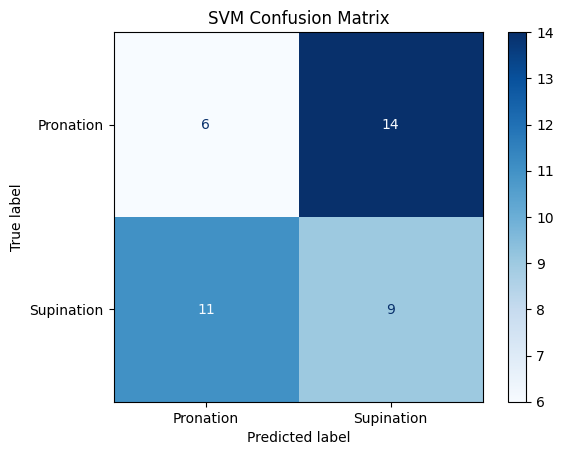


--- RF Evaluation ---
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.50      0.50      0.50        20

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40



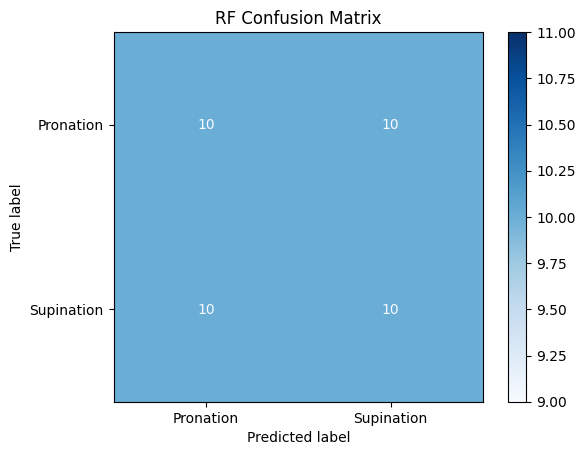

In [ ]:
#latten the EEG data
# Flatten: (n_epochs, n_channels, n_times) → (n_epochs, n_channels * n_times)
X = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n--- {name} Evaluation ---")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pronation", "Supination"])
    disp.plot(cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Optimization - Use cross validation for reliable perfomance matrix

### Deep Learning Model

#### RNN

In [ ]:
# Reverse the flaten before run this code
# X, y = loadData()
#Option 2: Deep Learning

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, cross_val_score
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler


# Standardize data
scaler = StandardScaler()
n_epochs, n_channels, n_times = X.shape
X_reshaped = X.reshape(n_epochs, -1)
X_scaled = scaler.fit_transform(X_reshaped).reshape(n_epochs, n_channels, n_times)

# Prepare PyTorch datasets
torch_X = torch.tensor(X_scaled, dtype=torch.float32)
torch_y = torch.tensor(y, dtype=torch.long)
dataset = TensorDataset(torch_X, torch_y)
#dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

In [ ]:
# Define RNN model
class EEG_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(EEG_RNN, self).__init__()
        self.rnn = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # reshape to (batch, time, channels)
        _, h_n = self.rnn(x)
        out = self.fc(h_n[-1])
        return out

In [ ]:
# Train model (generic trainer)
def train_model(model, trainloader, testloader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    # Evaluation
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(batch_y.numpy())

    print("\n--- Evaluation ---")
    print(classification_report(all_labels, all_preds))
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pronation", "Supination"])
    disp.plot(cmap="Purples")
    plt.title("Deep Learning Model Confusion Matrix")
    plt.show()



Training RNN...
Epoch 1/10, Loss: 7.3653
Epoch 2/10, Loss: 6.8004
Epoch 3/10, Loss: 6.5956
Epoch 4/10, Loss: 6.3544
Epoch 5/10, Loss: 6.1889
Epoch 6/10, Loss: 6.0513
Epoch 7/10, Loss: 5.7963
Epoch 8/10, Loss: 5.6121
Epoch 9/10, Loss: 5.2408
Epoch 10/10, Loss: 4.8631

--- Evaluation ---
              precision    recall  f1-score   support

           0       0.48      0.57      0.52        21
           1       0.40      0.32      0.35        19

    accuracy                           0.45        40
   macro avg       0.44      0.44      0.44        40
weighted avg       0.44      0.45      0.44        40



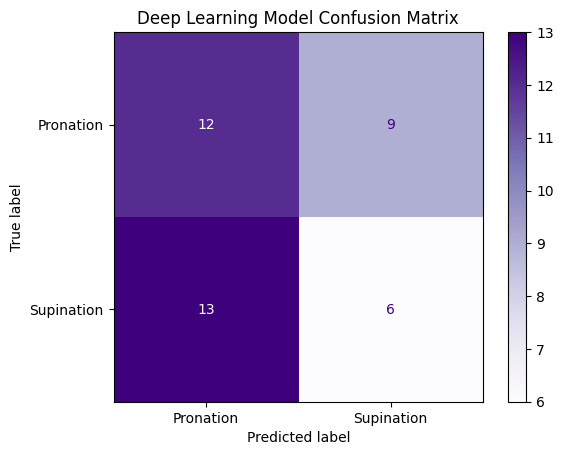

In [ ]:
# Initialize and train models
print("\nTraining RNN...")
rnn_model = EEG_RNN(input_size=n_channels, hidden_size=64, num_classes=2)
train_model(rnn_model, train_loader, test_loader)

#### Transformer

In [ ]:
class EEG_Transformer(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EEG_Transformer, self).__init__()
        self.input_size = input_size
        self.adjusted_dim = input_size if input_size % 4 == 0 else 4 * ((input_size // 4) + 1)
        self.proj = nn.Linear(in_features=self.input_size * n_times, out_features=self.adjusted_dim)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=self.adjusted_dim, nhead=4, batch_first=True)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        self.fc = nn.Linear(self.adjusted_dim, num_classes)

    def forward(self, x):
        b, c, t = x.size()
        x = x.view(b, -1)
        x = self.proj(x).unsqueeze(1)  # [B, 1, adjusted_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.fc(x)

In [ ]:
print("\nTraining Transformer...")
transformer_model = EEG_Transformer(input_size=n_channels, num_classes=2)
train_model(transformer_model, train_loader, test_loader)

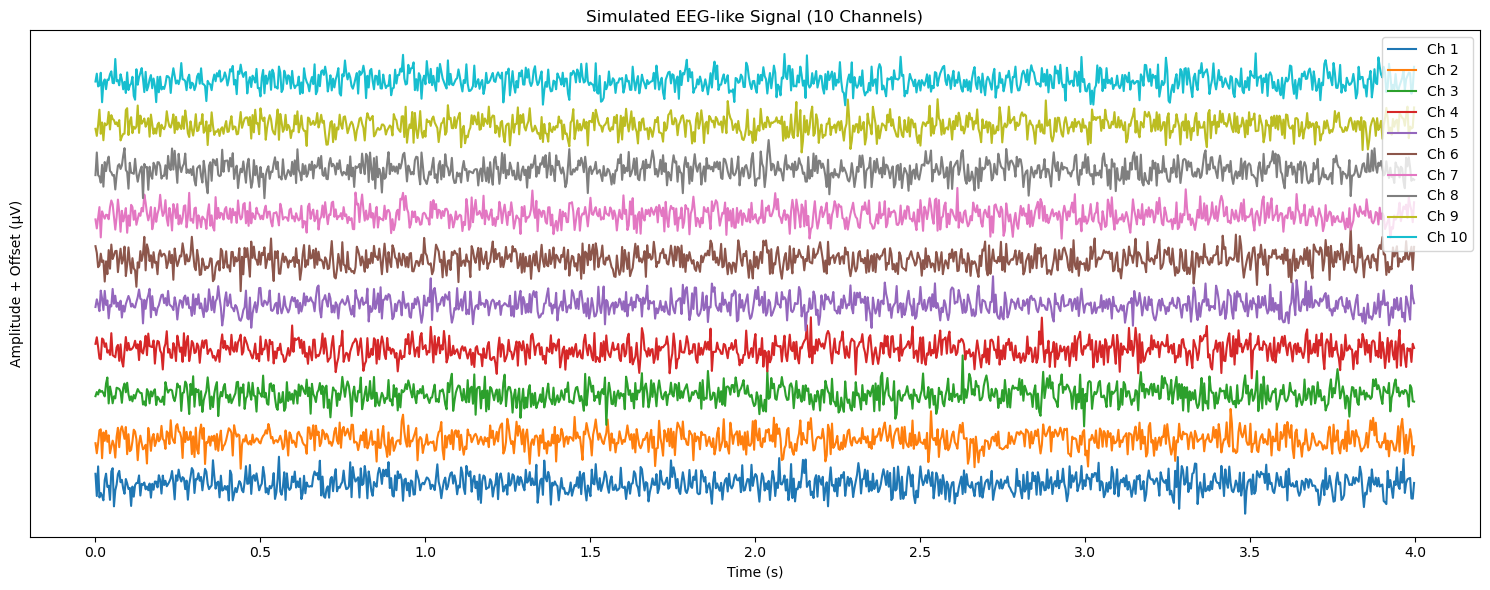

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate random EEG-like data
n_channels = 10
n_samples = 1000
sfreq = 250  # sampling frequency (Hz)
times = np.arange(n_samples) / sfreq  # time vector

# Random signal in microvolts
data = np.random.randn(n_channels, n_samples) * 10  # scale to ~10 µV

plt.figure(figsize=(15, 6))

# Plot each channel with vertical offset
for i in range(n_channels):
    plt.plot(times, data[i] + i * 50, label=f'Ch {i+1}')  # offset by 50 µV

plt.xlabel('Time (s)')
plt.ylabel('Amplitude + Offset (µV)')
plt.title('Simulated EEG-like Signal (10 Channels)')
plt.yticks([])  # hide y-axis ticks (because of offsets)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
import mne
import numpy as np

# Create info for 10 EEG channels
n_channels = 10
sfreq = 250  # Sampling frequency
ch_names = [f'EEG {i+1}' for i in range(n_channels)]
ch_types = ['eeg'] * n_channels
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Generate random EEG-like data (in Volts)
n_times = sfreq * 5  # 5 seconds
data = np.random.randn(n_channels, n_times) * 1e-6  # scale to ~1 µV

# Create Raw object from the synthetic data
raw = mne.io.RawArray(data, info)

# Plot only first 10 channels, autoscale on
raw.plot(n_channels=10, scalings='auto', title='Simulated EEG Data')


Creating RawArray with float64 data, n_channels=10, n_times=1250
    Range : 0 ... 1249 =      0.000 ...     4.996 secs
Ready.
Using qt as 2D backend.
